In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Exploration

In [6]:
import seaborn as sns

In [7]:
survived=df_train[df_train['Survived']==1]
died=df_train.drop(survived.index)

In [8]:
survived.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
337,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
338,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
339,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
340,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
died.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
544,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
545,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
546,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
547,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Gender

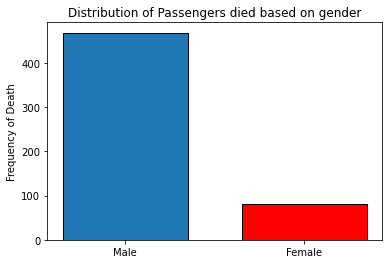

In [10]:
plt.figure()
bar=plt.bar(['Male','Female'],[died[died['Sex']=='male'].shape[0],died[died['Sex']=='female'].shape[0]],width=0.7,edgecolor='black')
bar[1].set_color('r')
bar[1].set_edgecolor('black')
plt.title('Distribution of Passengers died based on gender');
plt.ylabel('Frequency of Death');

Females death are less than quater of male deaths

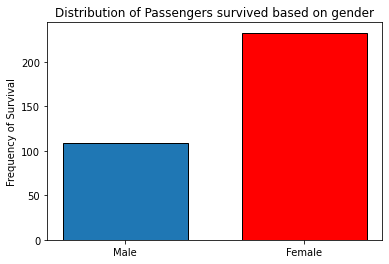

In [11]:
plt.figure()
bar=plt.bar(['Male','Female'],[survived[survived['Sex']=='male'].shape[0],survived[survived['Sex']=='female'].shape[0]],width=0.7,edgecolor='black')
bar[1].set_color('r')
bar[1].set_edgecolor('black')
plt.title('Distribution of Passengers survived based on gender');
plt.ylabel('Frequency of Survival');

As expected, females are usually rescued before males which causes almost double survival of females in comparison of males

In [12]:
df_train[['Survived','Sex']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


Although majority passengers were men, number of females rescued were greater. Majority of men lost their lives while almost 2/3rd of female passengers survived

#### Age

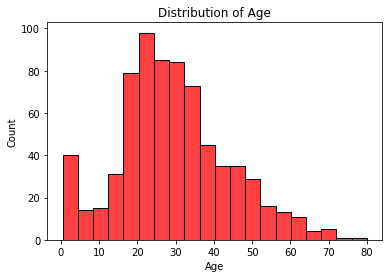

In [13]:
ax1=plt.axes()
sns.histplot(data=df_train,x='Age',ax=ax1,color='r');
plt.title('Distribution of Age');

Most passengers seem to be between 18-36 years old, though there were considerable old and children passengers.

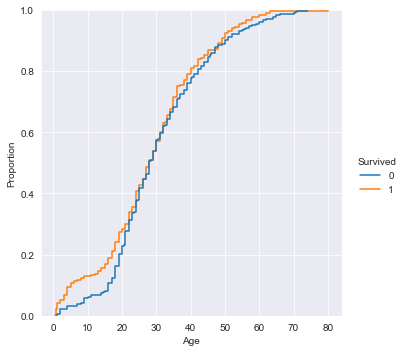

In [14]:
sns.set_style(style='darkgrid');
sns.displot(df_train,x='Age',hue='Survived',kind='ecdf');

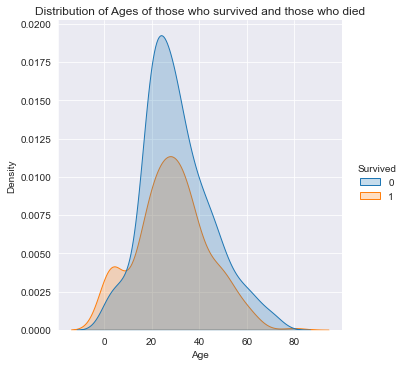

In [15]:
sns.displot(df_train,x='Age',hue='Survived',kind='kde',fill=True);
plt.title('Distribution of Ages of those who survived and those who died');

The visualisations highlight that age group 18-45 had relatively higher deaths while majority children were rescued. Although old age passengers also died but a small area at the end shows that the oldest ones were rescued.

#### Ticket Class

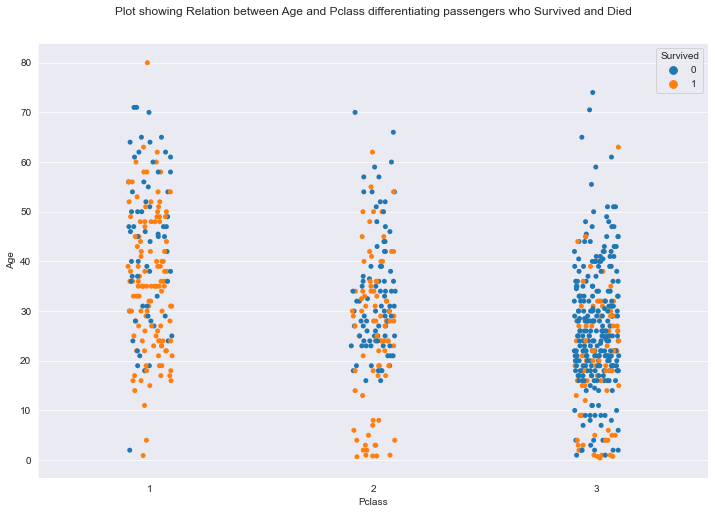

In [16]:
plt.figure(figsize=(12,8));
sns.stripplot(data=df_train,x='Pclass',y='Age',hue='Survived');
plt.title('Plot showing Relation between Age and Pclass differentiating passengers who Survived and Died', fontsize=12,y=1.05);


Ticket Class 3 seems to have realtively greater proportion of deaths. Traversing from Pclass 1 to 3 causing death rate to rise

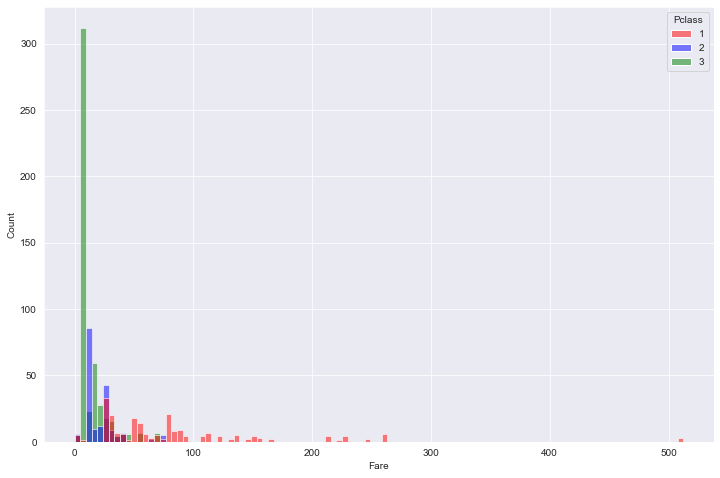

In [17]:
plt.figure(figsize=(12,8));
sns.histplot(data=df_train,hue='Pclass',x='Fare',fill=True,alpha=0.5,palette=['r','b','g']);

Class 3 has very low fare variance as majority class 3 passengers were paying fare between 0-20 USD. Therefore it can be said that Classes were divided based on fare prices. Class 1 passengers were the only one paying above 100 USD whereas class 2 passengers mostly paid between 30-70 USD. It can affect the deck level, cabin category and so on.

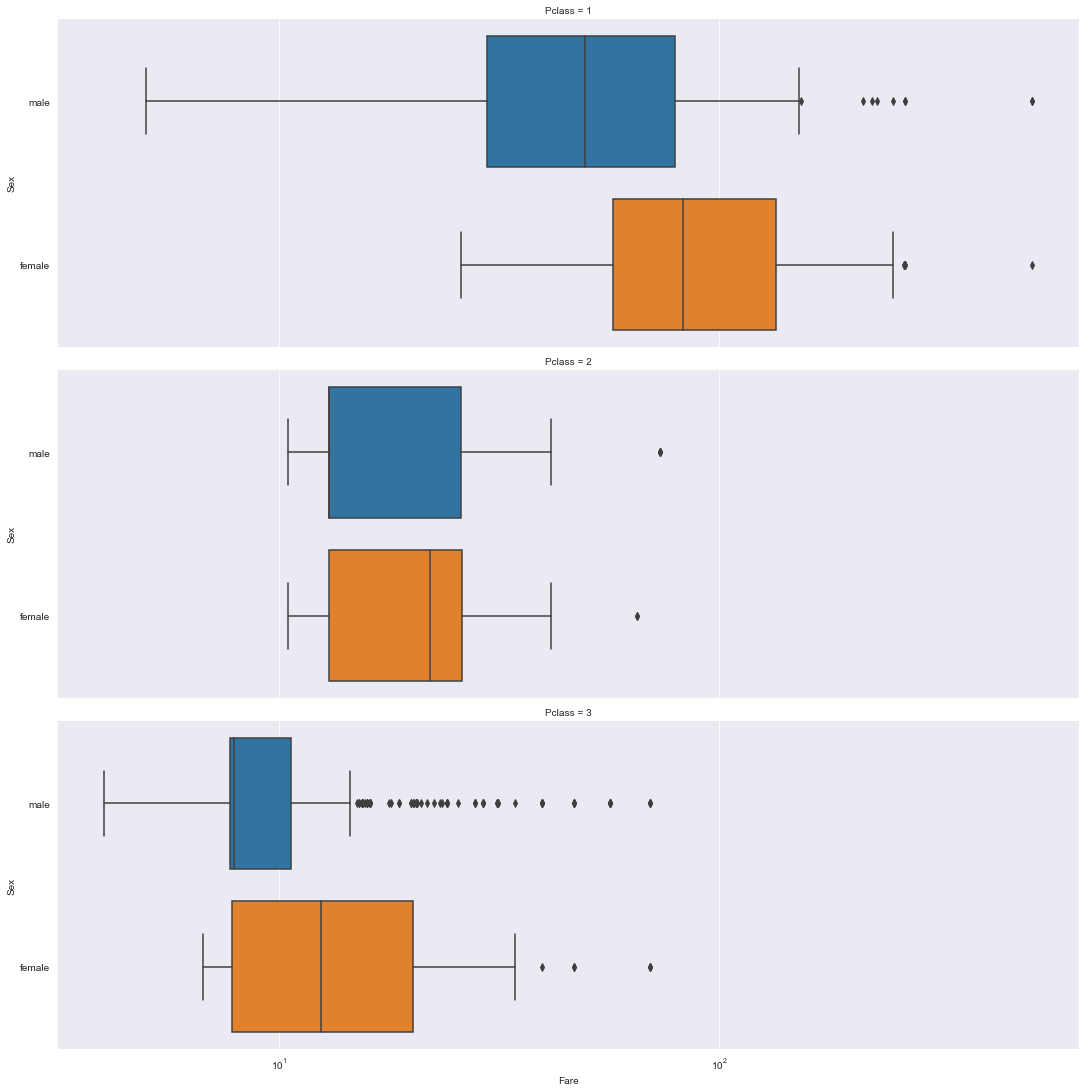

In [18]:
cp=sns.catplot(data=df_train[df_train['Fare']>0],x='Fare',y='Sex',row='Pclass',kind='box',orient='h',aspect=3);
cp.set(xscale='log');

Male passengers have relatively higher variance in fares whereas median fares for female is realtively higher in all the categories.

#### Siblings and Parents

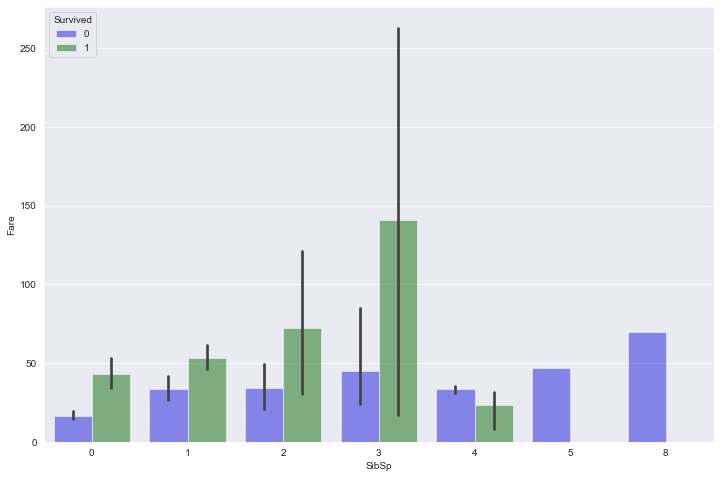

In [19]:
plt.figure(figsize=(12,8));
sns.barplot(data=df_train,hue='Survived',x='SibSp',y='Fare',fill=True,alpha=0.5,palette=['b','g']);

The graph highlights that people with 5 or higher siblings failed to survive.

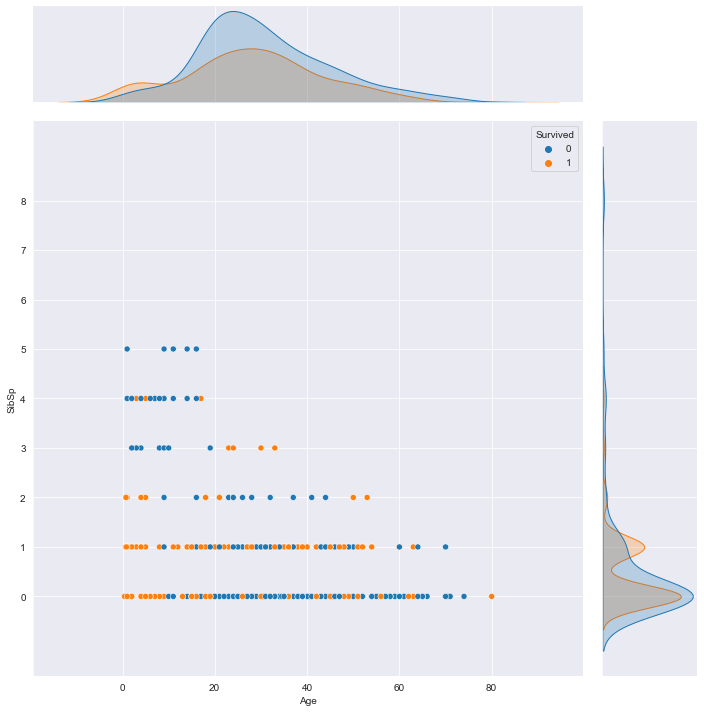

In [20]:
sns.jointplot(data=df_train,x='Age',y='SibSp',hue='Survived',height=10);
plt.yticks(range(0,9,1));

The jointplot shows that firstly, the distribution for number of siblings is highly left skewed whereas for age, it is approximately normal. Moreoever,people with no siblings has the relatively high death proportion especially the age group 18-45. 

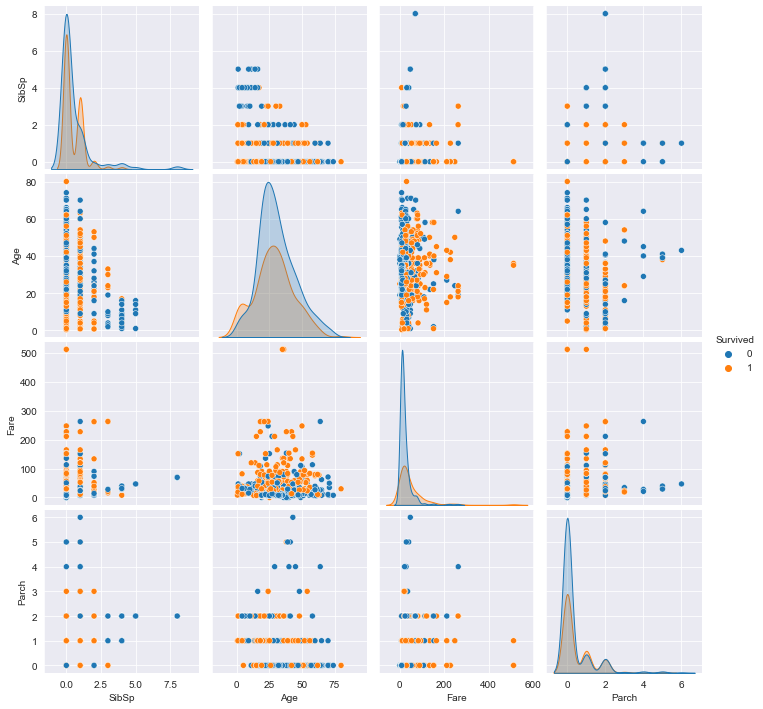

In [21]:
sns.pairplot(data=df_train[['SibSp','Sex','Age','Fare','Parch','Survived']],hue='Survived');

The pairplot shows that most passengers had no parents/children aboard and such passengers have high death rate as well. Whereas passengers will higher number of parent/child, mostly also failed to survive as they would have been helping their children to get to safety. 

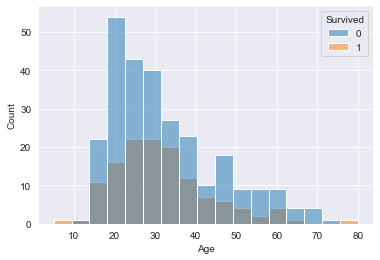

In [22]:
no_parch_sib=df_train[df_train['SibSp']==0]
no_parch_sib=no_parch_sib[no_parch_sib['Parch']==0]
sns.histplot(data=no_parch_sib,x='Age',hue='Survived');

In [23]:
parch_sib=df_train.drop(no_parch_sib.index)
parch_sib

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


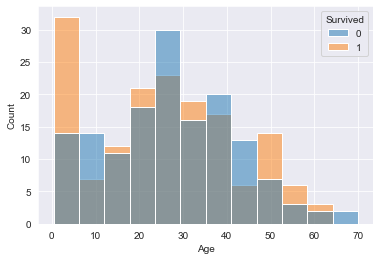

In [24]:
sns.histplot(data=parch_sib,x='Age',hue='Survived');

The histplots highlight again that those with no parent/child/sibling over had higher deaths irrespective of the age (excluding childs and older citizens). While those with parent/child/sibling, children and old age people had a higher survivial rate and even some young age groups had greater chance of survival.

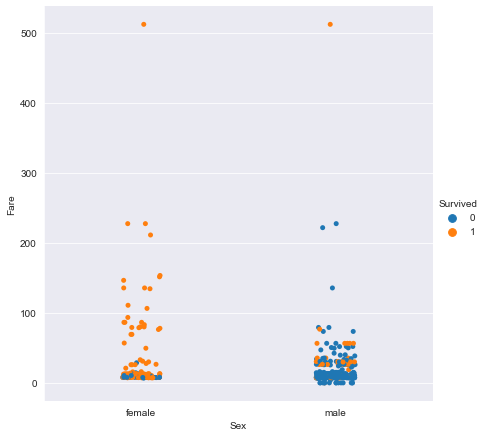

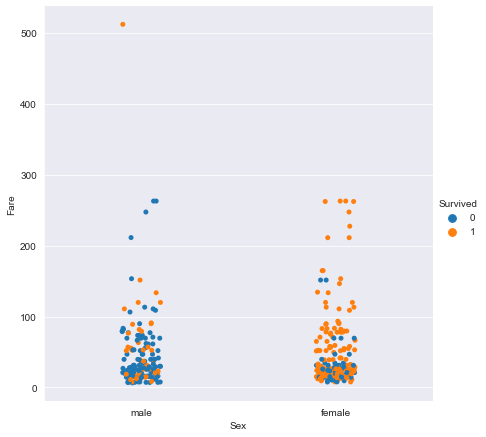

In [25]:
sns.catplot(data=no_parch_sib,hue='Survived',x='Sex',y='Fare',height=6);
sns.catplot(data=parch_sib,hue='Survived',x='Sex',y='Fare',height=6);

Females overall had greater chance of survival whereas if no parent/child/sibling accompanying further increase the chances of survival.

#### Embarked

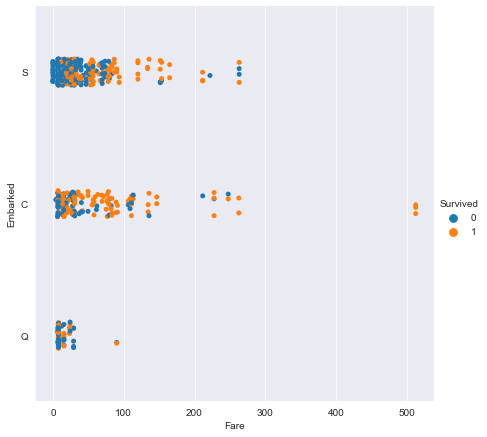

In [26]:
sns.catplot(data=df_train,x='Fare',y='Embarked',hue='Survived',height=6);

In [27]:
df_train[['Embarked','Survived']].groupby('Embarked').count()

,Survived
Embarked,
C,168
Q,77
S,644


## Data Cleaning

In [28]:
df_train=df_train.drop(['Cabin','Ticket'],axis=1)
print(df_train.shape)

(891, 10)


#### Dropped Cabin and Ticket as they seemed irrelevant to the problem

In [29]:
df_test=pd.DataFrame()
df_test=pd.read_csv('test.csv')
df_test=df_test.drop(['Cabin','Ticket'],axis=1)
print(df_test.shape)

(418, 9)


In [30]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [31]:
df_train['Sex']=df_train['Sex'].map({'female':0,'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})

#### Changing catergorical feature 'Sex'

In [32]:
df_train['Embarked'].fillna('S',inplace=True)

#### Filled the two NaN values in embarked with 'S', the most common value.

In [33]:
df_train['Embarked']=df_train['Embarked'].map({'S':0,'C':1,'Q':2})
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})

#### Changing categorical feature 'Embarked'

In [34]:
df_train['Age'].isnull().sum()

177

In [35]:
age_mean=df_train['Age'].mean()
age_sd=df_train['Age'].std()
rand_age=np.random.randint(age_mean-age_sd,age_mean+age_sd,size=177)

In [36]:
age=df_train['Age'].copy()
age[age.isnull()]=rand_age
df_train['Age']=age

In [37]:
age_mean2=df_test['Age'].mean()
age_sd2=df_test['Age'].std()
rand_age2=np.random.randint(age_mean2-age_sd2,age_mean2+age_sd2,size=86)

In [38]:
age2=df_test['Age'].copy()
age2[age2.isnull()]=rand_age2
df_test['Age']=age2

In [39]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [40]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [41]:
df_train['Age_grp']=pd.cut(df_train['Age'],5)
df_train[['Survived','Age_grp']].groupby('Age_grp',as_index=False).mean().sort_values('Age_grp',ascending=True)

,Age_grp,Survived
0,"(0.34, 16.336]",0.527273
1,"(16.336, 32.252]",0.359729
2,"(32.252, 48.168]",0.362934
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [42]:
df_train['Fare_grp']=pd.cut(df_train['Fare'],4)
df_train[['Survived','Fare_grp']].groupby('Fare_grp',as_index=False).mean().sort_values('Fare_grp',ascending=True)

,Fare_grp,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [43]:
for data in [df_train,df_test]:
    data.loc[data['Age']<=16,'Age']=0
    data.loc[(data['Age']>16) & (data['Age']<=32),'Age']=1
    data.loc[(data['Age']>32) & (data['Age']<=48),'Age']=2
    data.loc[(data['Age']>48) & (data['Age']<=64),'Age']=3
    data.loc[(data['Age']>64) & (data['Age']<=80),'Age']=4
    
    data.loc[data['Fare']<=128,'Fare']=0
    data.loc[(data['Fare']>128) & (data['Fare']<=256),'Age']=1
    data.loc[(data['Fare']>256) & (data['Fare']<=384),'Age']=2
    data.loc[(data['Fare']>384) & (data['Fare']<=513),'Age']=3
    

In [44]:
df_train.drop(['Age_grp','Fare_grp'],axis=1,inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,0.0,0


In [45]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,2.0,0,0,0.0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,0.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,0.0,2
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,0.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,0.0,0


In [46]:
for data in [df_train,df_test]:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(df_train['Title'],df_train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [47]:
for data in [df_train,df_test]:
    data['Title']=data['Title'].replace(['Countess','Don','Dr','Capt','Col','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
    data['Title']=data['Title'].replace(['Ms','Mlle'],'Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')

In [48]:
df_train[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


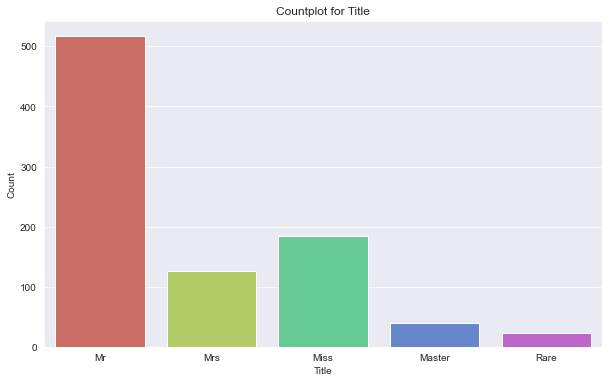

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train,x='Title',palette='hls')
plt.title('Countplot for Title');
plt.xlabel('Title');
plt.ylabel('Count');

In [50]:
for data in [df_train,df_test]:
    data['Title']=data['Title'].map({'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5})
    data['Title'].fillna(0,inplace=True)

In [51]:
df_train.drop(['Name','PassengerId'],axis=1,inplace=True)
pred_ID=df_test['PassengerId'].copy()
df_test.drop(['Name','PassengerId'],axis=1,inplace=True)

In [52]:
pred_ID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [53]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,0.0,0,1
1,1,1,0,2.0,1,0,0.0,1,2
2,1,3,0,1.0,0,0,0.0,0,3
3,1,1,0,2.0,1,0,0.0,0,2
4,0,3,1,2.0,0,0,0.0,0,1


In [54]:
for data in [df_train,df_test]:
    data['Fam']=data['SibSp'] + data['Parch'] +1
    data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [55]:
df_train[['Survived','Fam']].groupby('Fam',as_index=True).mean()

,Survived
Fam,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [56]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fam
0,0,3,1,1.0,0.0,0,1,2
1,1,1,0,2.0,0.0,1,2,2
2,1,3,0,1.0,0.0,0,3,1
3,1,1,0,2.0,0.0,0,2,2
4,0,3,1,2.0,0.0,0,1,1


In [57]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Fam
0,3,1,2.0,0.0,2,1.0,1
1,3,0,2.0,0.0,0,2.0,2
2,2,1,3.0,0.0,2,1.0,1
3,3,1,1.0,0.0,0,1.0,1
4,3,0,1.0,0.0,0,2.0,3


#### Hyperparameter Tuning of ML Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [59]:
x_train=df_train.drop('Survived',axis=1).copy()
y_train=df_train['Survived'].copy()
x_test=df_test.copy()

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#### Logistic Regression

In [61]:
hpt_LR=GridSearchCV(LogisticRegression(random_state=1),{'multi_class':['multinomial'],'solver':['lbfgs','sag','saga']},cv=6,n_jobs=-1,verbose=1,return_train_score=False)

In [62]:
hpt_LR.fit(x_train,y_train)

Fitting 6 folds for each of 3 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.1s finished


GridSearchCV(cv=6, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             verbose=1)

In [63]:
print('The best parameters are: ', hpt_LR.best_params_)
print('The best score is: ', hpt_LR.best_score_)

The best parameters are:  {'multi_class': 'multinomial', 'solver': 'lbfgs'}
The best score is:  0.8024744543200919


#### AdaBoost Classifier

In [64]:
hpt_ABC=GridSearchCV(AdaBoostClassifier(random_state=1),{'n_estimators':[25,50,100,300,500],'learning_rate':[0.1,0.2,0.3,0.4,0.5]},n_jobs=-1,verbose=1,return_train_score=False)

In [65]:
hpt_ABC.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   35.8s finished


GridSearchCV(estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [25, 50, 100, 300, 500]},
             verbose=1)

In [66]:
print('The best parameters are: ', hpt_ABC.best_params_)
print('The best score is: ', hpt_ABC.best_score_)

The best parameters are:  {'learning_rate': 0.2, 'n_estimators': 100}
The best score is:  0.8293892411022534


In [67]:
hpt_RFC=GridSearchCV(RandomForestClassifier(random_state=1),{'criterion':['gini','entropy'],'max_depth':[2,5,10,15,20],'n_estimators':[10,25,50,70,100],'min_samples_split':[2,5,10,15]},n_jobs=-1,verbose=1,cv=5,return_train_score=False)

In [68]:
hpt_RFC.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   58.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 25, 50, 70, 100]},
             verbose=1)

In [69]:
print('The best parameters are: ', hpt_RFC.best_params_)
print('The best score is ', hpt_RFC.best_score_)

The best parameters are:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 25}
The best score is  0.8338961772644531


#### Gradient Boost Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
hpt_GBC=GridSearchCV(GradientBoostingClassifier(random_state=1),{'learning_rate':[0.05,0.1,0.2,0.4],'n_estimators':[5,10,25,50,100],'subsample':[0.1,0.2,0.4,0.8],'min_samples_split':[5,10,25,50,100],'max_depth':[5,8,12]},n_jobs=-1,verbose=1,cv=5,return_train_score=False)

In [72]:
hpt_GBC.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3324 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5381 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  3.2min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.4],
                         'max_depth': [5, 8, 12],
                         'min_samples_split': [5, 10, 25, 50, 100],
                         'n_estimators': [5, 10, 25, 50, 100],
                         'subsample': [0.1, 0.2, 0.4, 0.8]},
             verbose=1)

In [73]:
print('The best parameters are: ', hpt_GBC.best_params_)
print('The best score is: ', hpt_GBC.best_score_)

The best parameters are:  {'learning_rate': 0.05, 'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 25, 'subsample': 0.8}
The best score is:  0.8439834285355596


#### Gradient Boost Classifier gave the highest score hence predictions will be generated using GBC

In [74]:
model_GBC=hpt_GBC.best_estimator_
pred_GBC=model_GBC.predict(x_test)
output=pd.DataFrame({'PassengerId':pred_ID,'Survived':pred_GBC})
output.to_csv('submission_GBC.csv',index=False)